In [43]:
import pandas as pd
import numpy as np
import time as time
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = []
for i in range(1,2):
    df.append(pd.read_csv(f'/Users/alex/Documents/Gambling/Blackjack/2deck_3to2_H17_surrender_doubleaftersplit_resplitaces.csv', index_col=0))
df = pd.concat(df).reset_index(drop=True)
df['hilow_true'] = df['hilow']/df['decks_remaining']
df['hilow_true_prior_int'] = df['hilow_true_prior'].round(0).astype(int)
df['dealer_bust'] = df['dealer_bust'].astype(int)


/Users/alex/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


ValueError: cannot convert float NaN to integer

In [46]:
df.loc[df['dealer_bust'].isna()]

,player,dealer,decks_remaining,hiopt1,hilow,aces,action,payout,dealer_bust,hilow_true_prior,hilow_true,hilow_true_prior_int
16,21,7,1.461538,3,3,-2,NaN,1.5,NaN,3.250000,2.052632,3
17,21,5,1.384615,4,3,-3,NaN,1.5,NaN,2.736842,2.166667,3
20,8,T,1.096154,8,7,-4,NaN,-1.0,NaN,5.114754,6.385965,5
24,18,A,0.730769,1,-1,-6,NaN,-1.0,NaN,1.238095,-1.368421,1
30,8,A,1.403846,2,3,-1,NaN,-1.0,NaN,1.350649,2.136986,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9999953,15,A,1.596154,4,4,-3,NaN,-1.0,NaN,2.988506,2.506024,3
9999956,66,A,1.326923,7,6,-4,NaN,-1.0,NaN,3.561644,4.521739,4
9999957,19,T,1.250000,4,3,-4,NaN,-1.0,NaN,3.768116,2.400000,4
9999960,21,4,0.961538,2,0,-6,NaN,1.5,NaN,0.962963,0.000000,1


In [62]:
r.params

array([0.26598286673931487, 0.00027848214191723424], dtype=object)

In [68]:
g = df.loc[~df['dealer_bust'].isna() & df['dealer'].isin(['5', '6'])]
g['dealer_bust'] = (g['dealer_bust'] * 1.).astype(float)
X = sm.add_constant(g['hilow_true_prior'])
print(X)
Y = g['dealer_bust']
print(Y)
r = sm.OLS(Y.values, X.values).fit()
r.params
# g['dealer_bust'].sum()/g['dealer_bust'].count()

         const  hilow_true_prior
14         1.0         -0.559140
18         1.0          1.444444
19         1.0          3.104478
39         1.0          0.000000
43         1.0          1.333333
...        ...               ...
9999984    1.0          6.618182
9999989    1.0          1.733333
9999992    1.0          1.405405
9999995    1.0          3.714286
9999997    1.0          3.319149

[1464232 rows x 2 columns]
14         0.0
18         0.0
19         0.0
39         0.0
43         1.0
          ... 
9999984    1.0
9999989    1.0
9999992    0.0
9999995    0.0
9999997    0.0
Name: dealer_bust, Length: 1464232, dtype: float64


<ipython-input-68-cfd8bb2c0d71>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['dealer_bust'] = (g['dealer_bust'] * 1.).astype(float)


array([0.43362936, 0.00739136])

In [70]:
g.groupby(['hilow_true_prior_int'])['dealer_bust'].mean()

hilow_true_prior_int
-23    1.000000
-22    0.250000
-21    0.285714
-20    0.333333
-19    0.400000
-18    0.304878
-17    0.267045
-16    0.320132
-15    0.329044
-14    0.375139
-13    0.369393
-12    0.359506
-11    0.357032
-10    0.366702
-9     0.376835
-8     0.376455
-7     0.389022
-6     0.393987
-5     0.402184
-4     0.404739
-3     0.407631
-2     0.417936
-1     0.424094
 0     0.432461
 1     0.438852
 2     0.450032
 3     0.457094
 4     0.463935
 5     0.468862
 6     0.487830
 7     0.493610
 8     0.501542
 9     0.518466
 10    0.517501
 11    0.536000
 12    0.529014
 13    0.544944
 14    0.592798
 15    0.552239
 16    0.529412
 17    0.627907
 18    0.454545
 19    0.500000
 20    1.000000
 21    0.000000
 22    0.000000
Name: dealer_bust, dtype: float64

<AxesSubplot:>

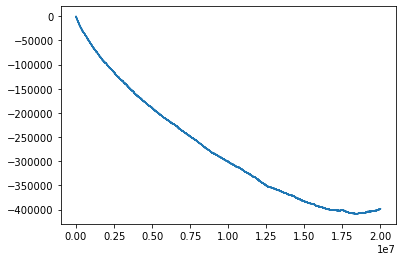

In [13]:
df.sort_values('hilow_true_prior_int')['payout'].cumsum().reset_index(drop=True).plot()

In [2]:
plt.plot(df.groupby('hilow_true_prior_int')[['payout']].count()/len(df))

AttributeError: 'list' object has no attribute 'groupby'

In [3]:
df.groupby('hilow_true_prior_int')['payout'].mean()

AttributeError: 'list' object has no attribute 'groupby'

In [16]:
X = sm.add_constant(df['hilow_true_prior'])
Y = df['payout']
r = sm.OLS(Y, X).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 payout   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3102.
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:39:49   Log-Likelihood:            -3.1353e+07
No. Observations:            20000031   AIC:                         6.271e+07
Df Residuals:                20000029   BIC:                         6.271e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0189      0.000    -72.724      0.000      -0.019      -0.018
hilow_true_prior     0.0044   7.87e-05     55.691      0.000       0.004       0.005
==============================================================================
Omnibus:                  4697988.271   Durbin-Watson:                   1.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           917090.926
Skew:                           0.158   Prob(JB):                         0.00
Kurtosis:                       1.999   Cond. No.                         3.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
df['push'].mean()

0.08788281378163863

In [25]:
X = sm.add_constant(df['hilow_true_prior'])
Y = df['push']
r = sm.OLS(Y, X).fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   push   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1970.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:23:52   Log-Likelihood:            -3.1404e+06
No. Observations:            20000031   AIC:                         6.281e+06
Df Residuals:                20000029   BIC:                         6.281e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0881   6.35e-05   1387.954      0.000       0.088       0.088
hilow_true_prior     0.0009   1.92e-05     44.387      0.000       0.001       0.001
==============================================================================
Omnibus:                 11384658.469   Durbin-Watson:                   1.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         63168043.045
Skew:                           2.911   Prob(JB):                         0.00
Kurtosis:                       9.474   Cond. No.                         3.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Probability of 3-card 19

In [73]:
import random

num_decks = 2
penetration = 1.25
shoes_simulated = 100000


rank = list(range(1, 10)) + 4*[10]
suit = 'shdc'
cut_card = (num_decks - penetration) * 52

_hands = 0
_19 = 0
_s21 = 0

for i in range(shoes_simulated):
    deck = [(r, s) for s in suit for r in rank] * num_decks
    random.shuffle(deck)
    hands = [deck[i:i+3] for i in range(0, int(penetration*52) + 3)]
    _hands += len(cards)
    _19 += sum(sum(c[0] for c in h)==19 for h in hands)
    _s21 += sum(sum(c[0] for c in h)==21 and len(set(c[1] for c in h))==1 for h in hands)

print(_19/_hands, _s21/_hands)
        
print(deck)

0.0651895588235294 0.004661617647058824
[(6, 's'), (4, 'h'), (8, 's'), (1, 'c'), (4, 's'), (7, 'h'), (10, 'c'), (10, 'c'), (7, 's'), (5, 'h'), (1, 'd'), (9, 'h'), (9, 'h'), (10, 'c'), (3, 'h'), (10, 'h'), (2, 'h'), (1, 's'), (10, 'd'), (1, 'd'), (10, 'h'), (8, 'c'), (5, 'd'), (3, 's'), (3, 'c'), (10, 'c'), (2, 'c'), (2, 's'), (8, 'h'), (10, 'd'), (6, 'h'), (2, 'h'), (10, 's'), (4, 's'), (2, 'd'), (7, 'd'), (3, 's'), (6, 'c'), (10, 'c'), (6, 'd'), (2, 'd'), (10, 'h'), (6, 'h'), (1, 'c'), (9, 's'), (4, 'c'), (10, 's'), (8, 'h'), (9, 's'), (9, 'c'), (10, 'd'), (10, 'd'), (10, 'h'), (5, 's'), (7, 'c'), (10, 'd'), (5, 'c'), (10, 'h'), (6, 'd'), (10, 'h'), (7, 's'), (10, 'd'), (10, 's'), (10, 'c'), (5, 'h'), (9, 'd'), (10, 's'), (4, 'h'), (3, 'h'), (10, 'd'), (8, 'd'), (2, 's'), (1, 's'), (6, 'c'), (4, 'c'), (10, 's'), (8, 'd'), (10, 'h'), (7, 'd'), (5, 'c'), (6, 's'), (7, 'c'), (4, 'd'), (8, 'c'), (10, 'd'), (10, 's'), (3, 'd'), (1, 'h'), (10, 'c'), (10, 's'), (9, 'c'), (3, 'c'), (10, 's'),